# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [76]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

!pip install seaborn
import seaborn as sns

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [77]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].astype(str).apply(len)

In [78]:
# Calcula media, mediana y moda de la columna 'title_length'

longitudes = df['title_length'].astype(int)

media = longitudes.mean()
mediana = longitudes.median()
moda = mode(longitudes, keepdims=True).mode[0]

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")


Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [79]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

longitudes = df['title_length'].astype(int)

rango = longitudes.max() - longitudes.min()
varianza = longitudes.var()
desviacion = longitudes.std()

print(f"Rango : {rango}")
print(f"Varianza:  {varianza}")
print(f"Desviación estándar:  {desviacion}")


Rango : 67
Varianza:  72.1067488840288
Desviación estándar:  8.491569282766807


In [80]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(columna)
curtosis = kurtosis(columna)

print(f"Asimetría (skew): {asimetria}")
print(f"Curtosis: {curtosis}")


Asimetría (skew): 1.5229143965677572
Curtosis: 3.7867237597626007


In [81]:
# Imprime el título más corto y el título más largo según su longitud

print("Titulo más corto:", df['title_length'].min())
print("Titulo más largo:", df['title_length'].max())

Titulo más corto: 1
Titulo más largo: 68


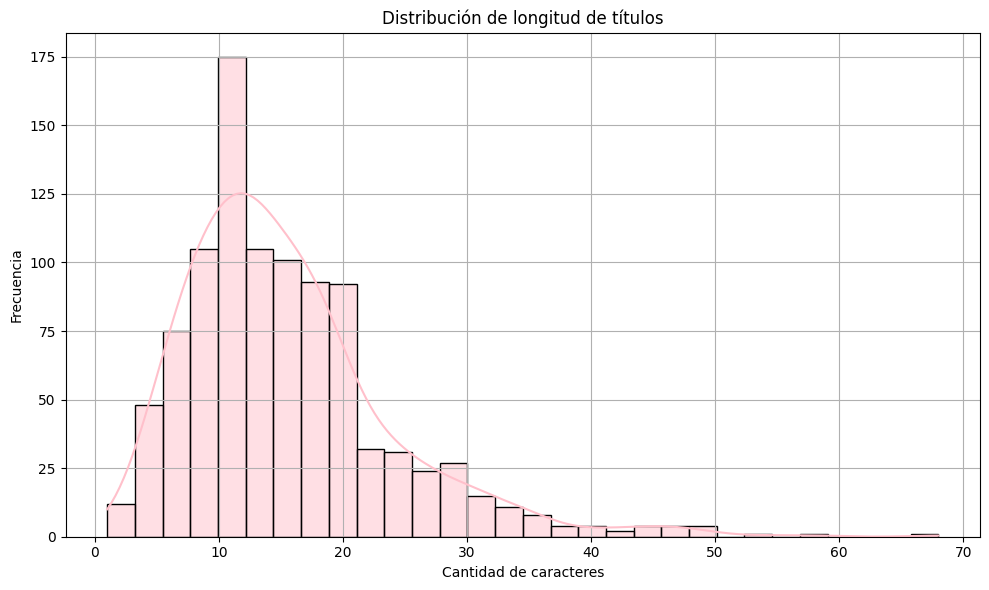

In [82]:
# grafica tus resultados
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], kde=True, bins=30, color="pink", edgecolor="black")

plt.title("Distribución de longitud de títulos")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [83]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
muestra = df['title_length'].sample(n=5)  
print(muestra)


800    15
254    13
155    16
516    12
62     11
Name: title_length, dtype: int64


In [84]:
sumatoria = 0
counter = 0

for i in muestra:
    sumatoria += i
    counter += 1

media = sumatoria / counter if counter > 0 else None
media

13.4

In [85]:
diferencias_cuadradas = []
for valor in muestra:
    diferencia = valor - media
    diferencia_cuadrada = diferencia ** 2
    diferencias_cuadradas.append(diferencia_cuadrada)

print("Diferencias al cuadrado")
for i, dif in enumerate(diferencias_cuadradas[:10]):
    print(f"{i+1}: {dif}")


Diferencias al cuadrado
1: 2.5599999999999987
2: 0.16000000000000028
3: 6.759999999999998
4: 1.960000000000001
5: 5.760000000000002


In [86]:
suma_diferencias = 0
for dc in diferencias_cuadradas:
    suma_diferencias += dc

varianza = suma_diferencias / counter if counter > 0 else None

def raiz_cuadrada(n, tol=1e-10):
    if n < 0:
        return None
    x = n
    while True:
        raiz = 0.5 * (x + n / x)
        if abs(raiz - x) < tol:
            return raiz
        x = raiz

desviacion = raiz_cuadrada(varianza)
print(varianza)
print(desviacion)

3.44
1.8547236990991407
